<Figure size 432x288 with 0 Axes>

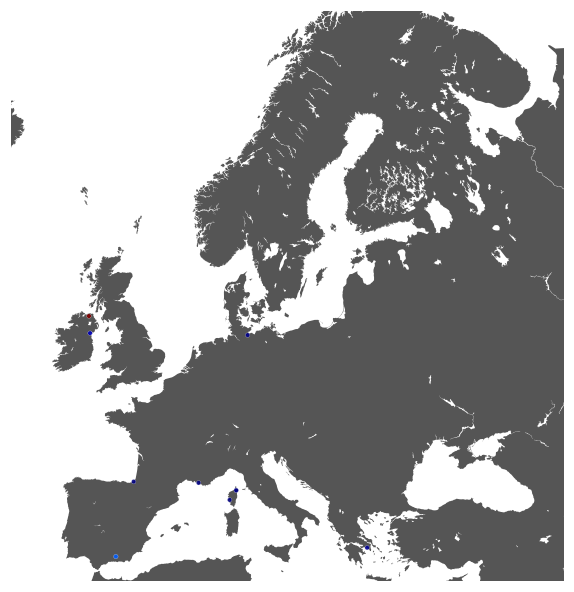

In [44]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import matplotlib.cm as cm
import matplotlib.colors as co

# To display world map
m = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-155, 
        llcrnrlat=-60,
        urcrnrlon=180,
        urcrnrlat=75,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

europe = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=35,
        urcrnrlon=45,
        urcrnrlat=70,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

gtd_dataframe = pd.read_csv('gtd_test.csv', usecols=["country", "region_txt", "longitude", "latitude"])
gtd_dataframe.columns

#gtd_dataframe = gtd_dataframe.dropna()
europe_dataframe = gtd_dataframe.loc[gtd_dataframe['region_txt'] == 'Western Europe']

map_points = pd.Series(
                [Point(m(mapped_x, mapped_y)) 
                 for mapped_x, mapped_y in zip(gtd_dataframe['longitude'],
                                               gtd_dataframe['latitude'])])

europe_points = pd.Series(
                [Point(europe(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(europe_dataframe['longitude'], 
                                               europe_dataframe['latitude'])])

amre_points = MultiPoint(list(map_points.values)) 
europe_repoints = MultiPoint(list(europe_points.values))

country = gtd_dataframe['country']
europe_country = europe_dataframe['country']
cmap = plt.cm.jet

norm = co.Normalize(vmin=country.min(), vmax=country.max())
pointcolors = plt.cm.ScalarMappable(norm, cmap)
col = pointcolors.to_rgba(country)

europe_norm = co.Normalize(vmin=europe_country.min(), vmax=europe_country.max())
europecolors = plt.cm.ScalarMappable(europe_norm, cmap)
europe_col = europecolors.to_rgba(europe_country)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

# Create a scatterplot on the map
dev = europe.scatter(
            [geom.x for geom in europe_points],
            [geom.y for geom in europe_points],
            20, marker='o', lw=.25,
            facecolor=europe_col, edgecolor='w',
            alpha=0.9,antialiased=True,
            zorder=3)

europe.fillcontinents(color='#555555')
plt.savefig("europe.png")


In [39]:
gtd_dataframe

eventid  iyear  imonth  iday  approxdate  extended  resolution  \
0    199705180003   1997       5    18         NaN         1  11/14/1997   
1    199705180004   1997       5    18         NaN         0         NaN   
2    199705190001   1997       5    19         NaN         0         NaN   
3    199705190002   1997       5    19         NaN         0         NaN   
4    199705190003   1997       5    19         NaN         0         NaN   
5    199705190004   1997       5    19         NaN         0         NaN   
6    199705200001   1997       5    20         NaN         0         NaN   
7    199705200002   1997       5    20         NaN         0         NaN   
8    199705200003   1997       5    20         NaN         0         NaN   
9    199705200004   1997       5    20         NaN         0         NaN   
10   199705200005   1997       5    20         NaN         0         NaN   
11   199705200006   1997       5    20         NaN         0         NaN   
12   199705200007   1997       5    20         NaN         0         NaN   
13   199705210001   1997       5    21         NaN         0         NaN   
14   199705210002   1997       5    21         NaN         0         NaN   
15   199705210003   1997       5    21         NaN         0         NaN   
16   199705210004   1997       5    21         NaN         0         NaN   
17   199705210005   1997       5    21         NaN         1    6/8/1997   
18   199705210006   1997       5    21         NaN         0         NaN   
19   199705220001   1997       5    22         NaN         0         NaN   
20   199705220002   1997       5    22         NaN         0         NaN   
21   199705220003   1997       5    22         NaN         0         NaN   
22   199705230001   1997       5    23         NaN         0         NaN   
23   199705250001   1997       5    25         NaN         0         NaN   
24   199705250002   1997       5    25         NaN         0         NaN   
25   199705250003   1997       5    25         NaN         0         NaN   
26   199705250004   1997       5    25         NaN         0         NaN   
27   199705250005   1997       5    25         NaN         0         NaN   
28   199705250006   1997       5    25         NaN         0         NaN   
29   199705250007   1997       5    25         NaN         0         NaN   
..            ...    ...     ...   ...         ...       ...         ...   
97   199706010012   1997       6     1         NaN         0         NaN   
98   199706010013   1997       6     1         NaN         0         NaN   
99   199706020001   1997       6     2         NaN         0         NaN   
100  199706020003   1997       6     2         NaN         0         NaN   
101  199706020004   1997       6     2         NaN         0         NaN   
102  199706020006   1997       6     2         NaN         0         NaN   
103  199706020007   1997       6     2         NaN         1    6/6/1997   
104  199706020008   1997       6     2         NaN         0         NaN   
105  199706020009   1997       6     2         NaN         0         NaN   
106  199706030001   1997       6     3         NaN         0         NaN   
107  199706030002   1997       6     3         NaN         0         NaN   
108  199706030003   1997       6     3         NaN         0         NaN   
109  199706030004   1997       6     3         NaN         0         NaN   
110  199706030005   1997       6     3         NaN         0         NaN   
111  199706030006   1997       6     3         NaN         0         NaN   
112  199706040001   1997       6     4         NaN         0         NaN   
113  199706040002   1997       6     4         NaN         0         NaN   
114  199706040003   1997       6     4         NaN         0         NaN   
115  199706040004   1997       6     4         NaN         0         NaN   
116  199706040005   1997       6     4         NaN         0         NaN   
117  199706040006   1997       6     4         NaN        